In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('Display.max_columns',None)

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


First we will check is there any nan values present in the Dataset.

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

From above, there are no Nan values present in Dataset.

Now we will analyse each feature

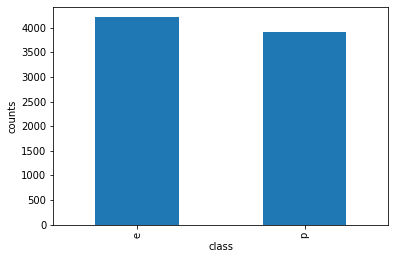

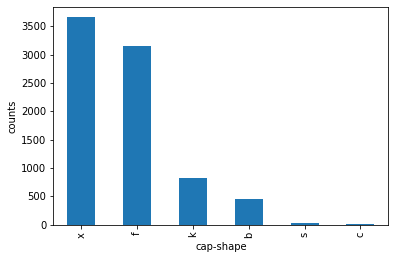

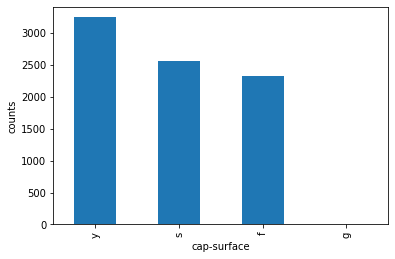

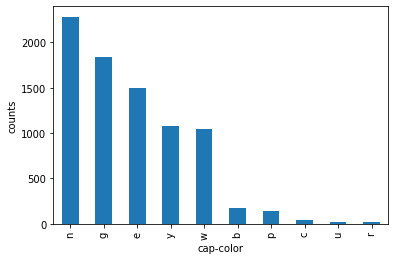

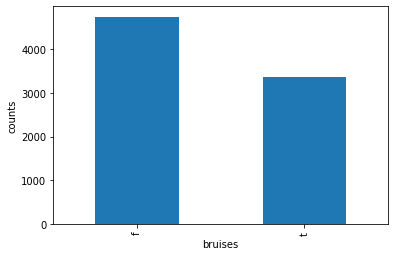

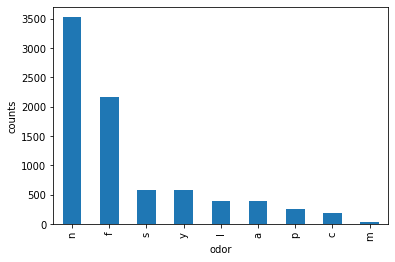

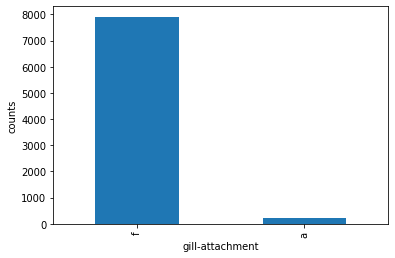

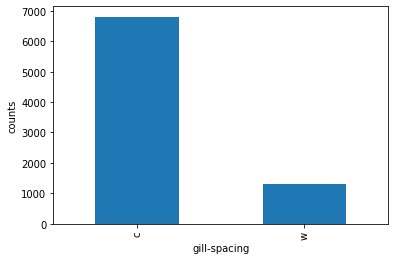

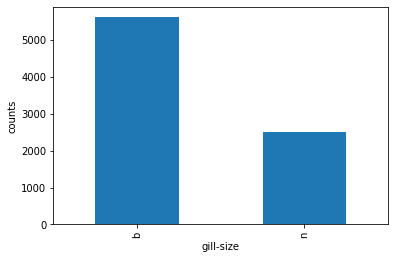

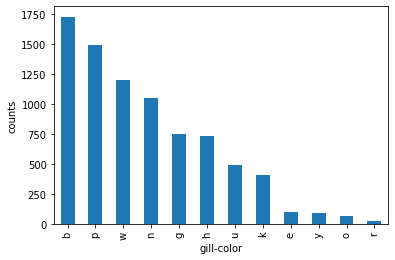

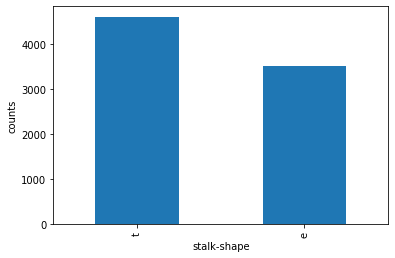

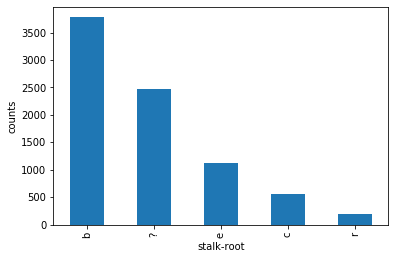

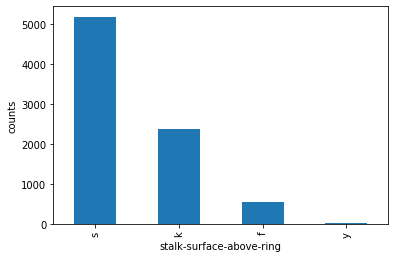

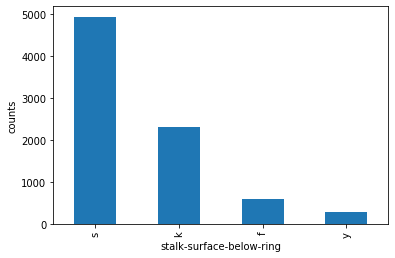

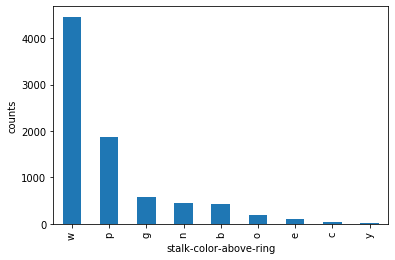

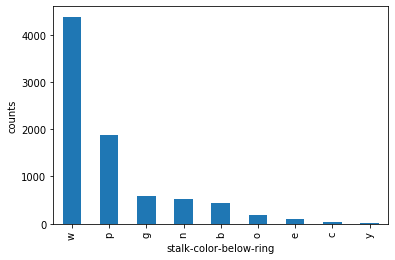

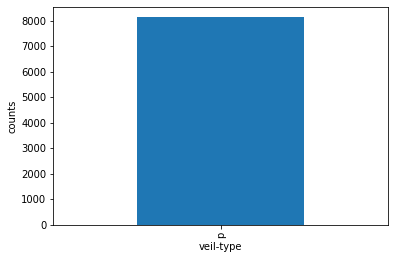

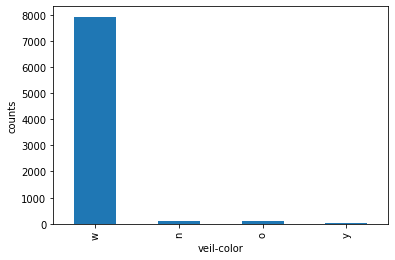

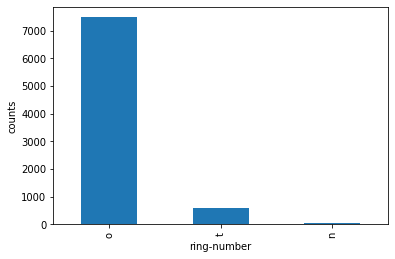

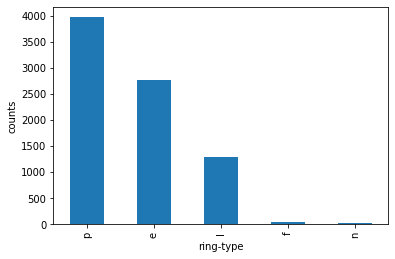

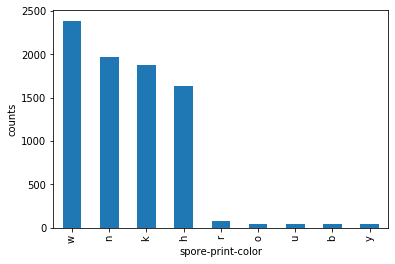

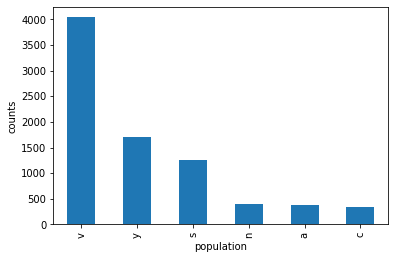

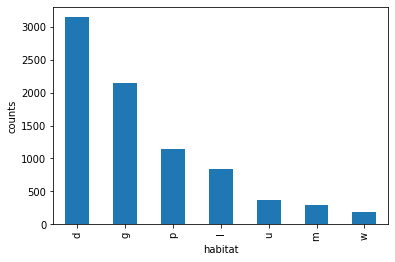

In [5]:
for feature in df.columns:
    df[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.show()

From above,

        1 : 'veil-type' has single label.So, we are droping it.
        2 : 'stalk-root' has '?' label. we will change it to 'o'(other)
        3 : There are many features having One or Two pre-dominant labels.
        
        

In [6]:
df.drop('veil-type',axis=1,inplace=True)

In [7]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [8]:
df['stalk-root'] = np.where(df['stalk-root']=='?','o',df['stalk-root'])

We are renaming output variable(class) to 'poisonous' for our convenience.

In [9]:
df.rename(columns={'class':'poisonous'},inplace=True)

In [10]:
df['poisonous'].value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

Dataset is balanced. Which is positive sign. 

we are changing (poisonous) 'p' to 1  and (eatable) 'e' to 0.

In [11]:
df['poisonous'] = np.where(df['poisonous']=='p',1,0)

In [12]:
df['poisonous'].value_counts()

0    4208
1    3916
Name: poisonous, dtype: int64

In [13]:
features = [ feature for feature in df.columns if feature != 'poisonous' ]

Analysing every feature with count plot for better understanding of the data. 

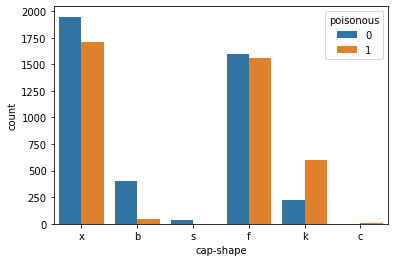

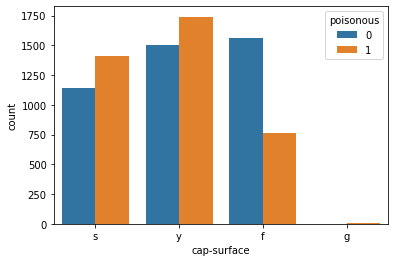

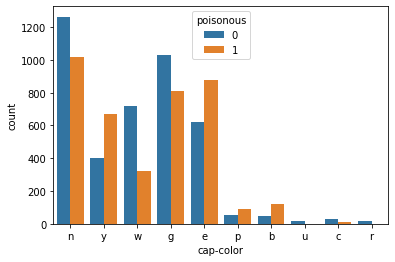

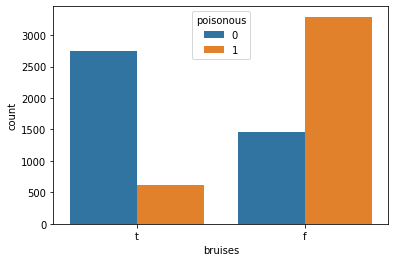

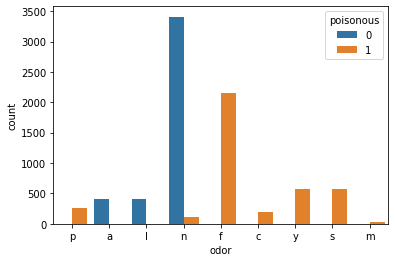

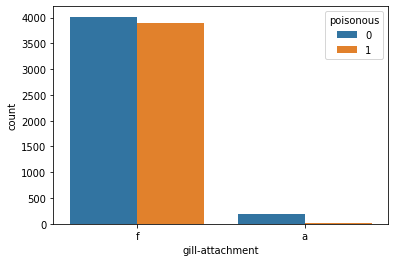

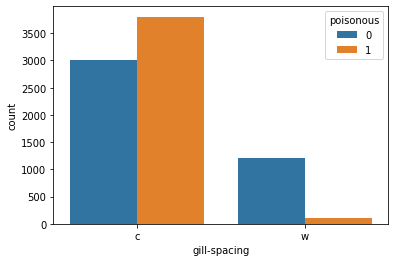

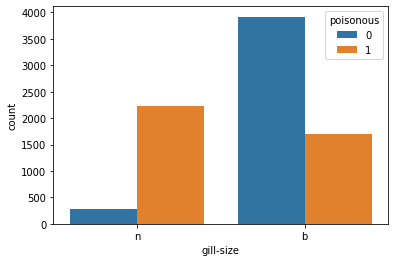

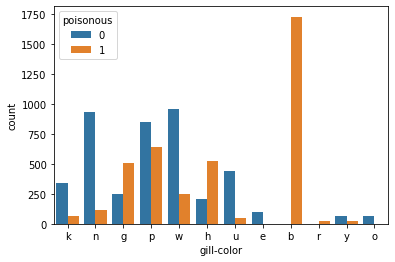

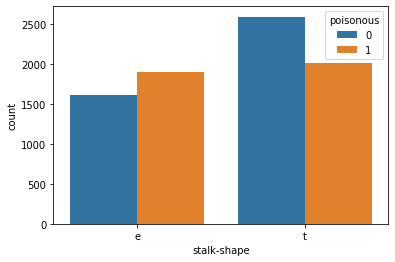

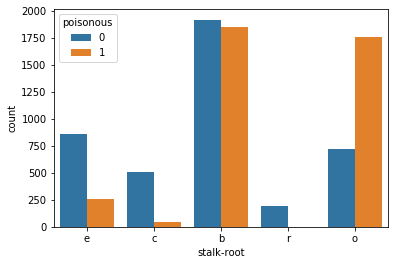

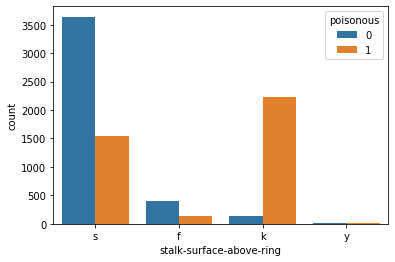

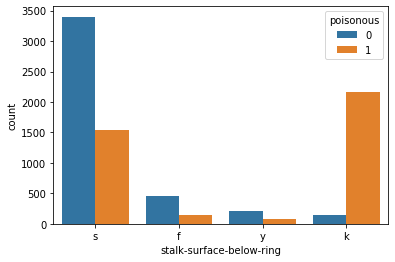

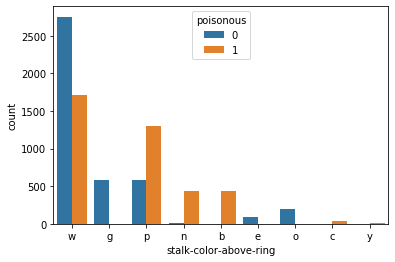

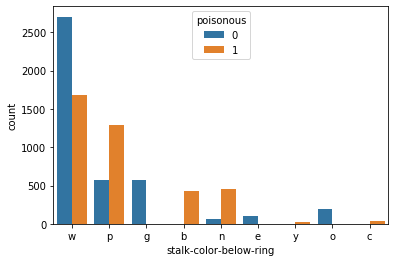

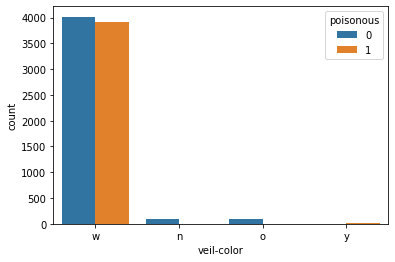

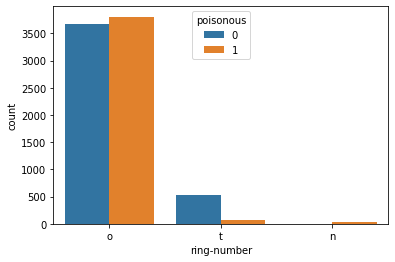

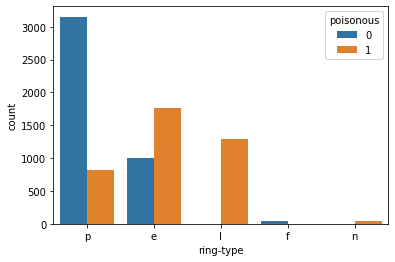

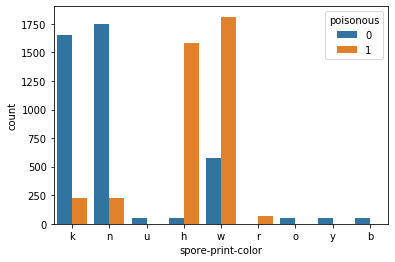

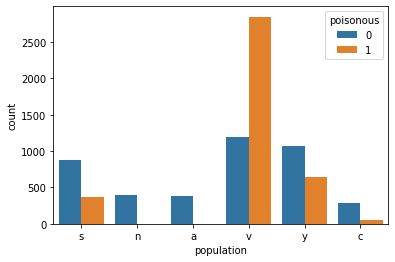

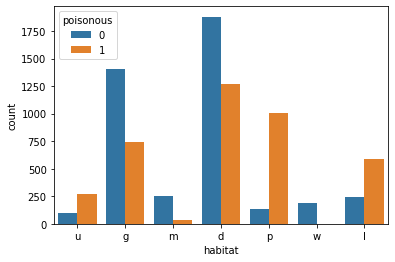

In [14]:
for feature in features:
    sns.countplot(x=feature,data=df,hue='poisonous')
    plt.show()
    

From above,

           1 : In most of the features, the small amount categories holding more information regarding output variable.
           2 : odor feature is higly correlated with output variable. 

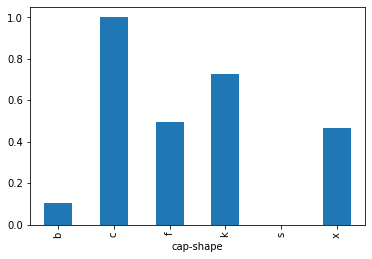

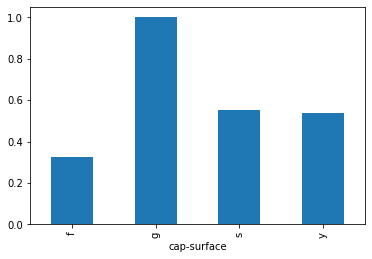

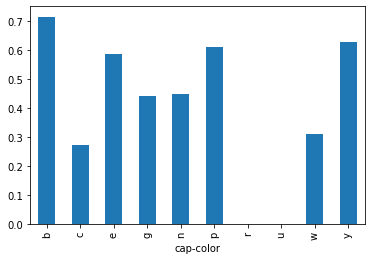

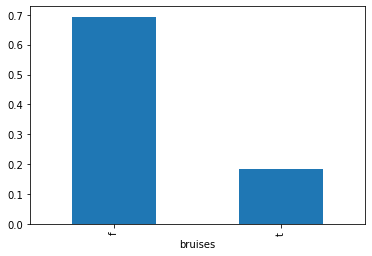

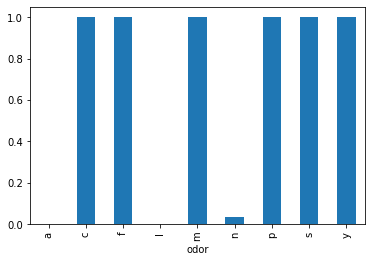

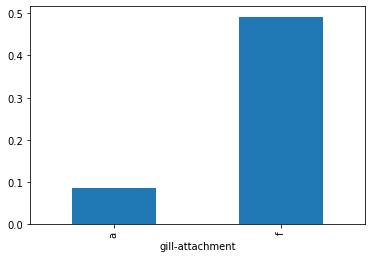

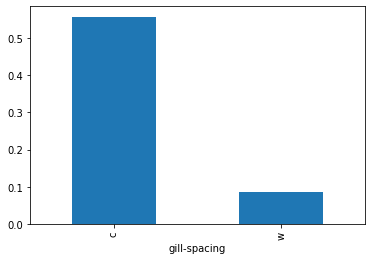

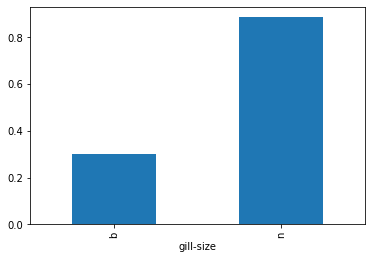

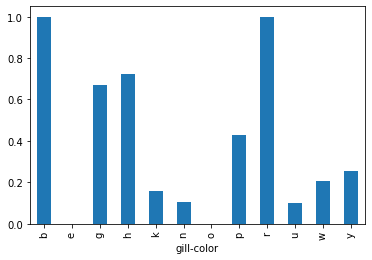

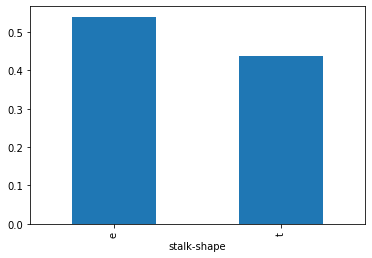

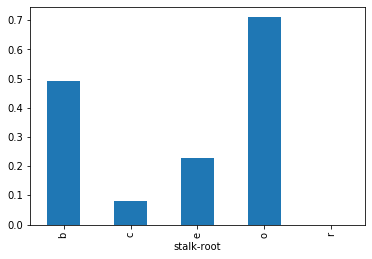

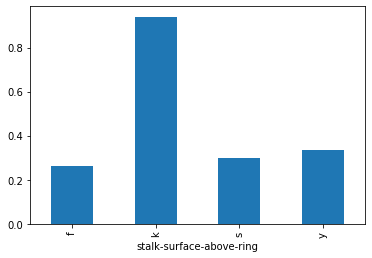

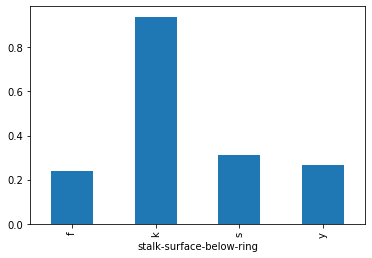

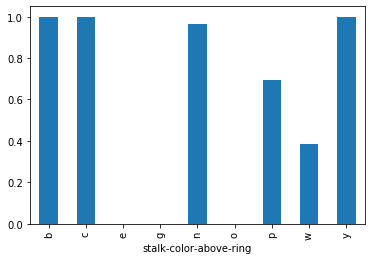

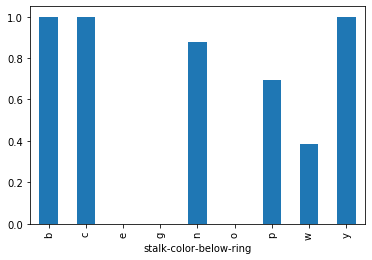

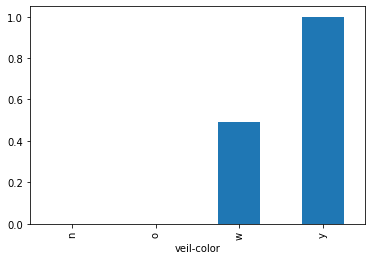

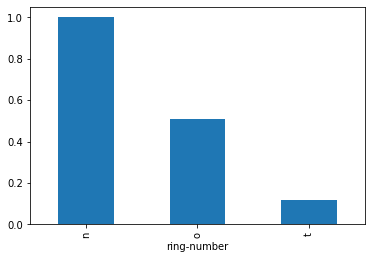

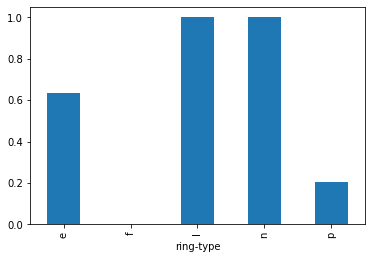

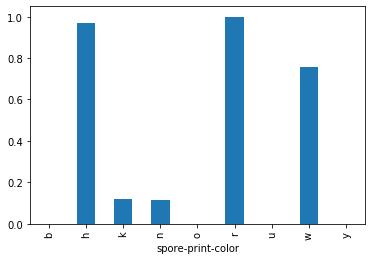

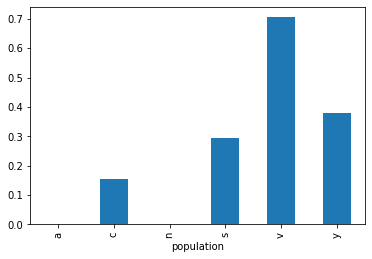

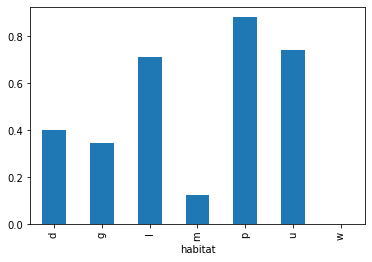

In [15]:
for feature in features:
    df.groupby(feature)['poisonous'].mean().plot.bar()
    plt.xlabel(feature)
    plt.show()

From above,

       1 : There are one or more categories in each feature having mean = 1 and mean = 0
           Which helps to easily classify the Mushroooms.
        
       2 : Again odor feature holding more information regarding output.

We are using Target guided encoding for handling categorical features because it gives us monotonic relationship with output variable.

We can also use mean encoding.



In [16]:
df.groupby(['stalk-color-above-ring'])['poisonous'].mean().sort_values()

stalk-color-above-ring
e    0.000000
g    0.000000
o    0.000000
w    0.383513
p    0.692308
n    0.964286
b    1.000000
c    1.000000
y    1.000000
Name: poisonous, dtype: float64

We are directly mapping ordinal numbers to the labels accordingly.   

In [17]:
for feature in features:
    ordered_labels = df.groupby([feature])['poisonous'].mean().sort_values().index
    ordinal_label = {k:i for i,k in enumerate(ordered_labels,0)}
    df[feature] = df[feature].map(ordinal_label)
    

In [18]:
df.groupby(['stalk-color-above-ring'])['poisonous'].mean().sort_values()

stalk-color-above-ring
0    0.000000
1    0.000000
2    0.000000
3    0.383513
4    0.692308
5    0.964286
6    1.000000
7    1.000000
8    1.000000
Name: poisonous, dtype: float64

In this way for every feature, we can easily predict whether if value is less than threshold value than it is treated is eatable (0) else poisonous (1)    

In [19]:
df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,5,0,6,1,1,1,4,1,2,1,2,3,3,2,1,1,5,3,5
1,0,2,2,8,0,0,1,1,0,4,1,1,1,2,3,3,2,1,1,4,1,2
2,0,1,2,3,0,1,1,1,0,3,1,1,1,2,3,3,2,1,1,4,1,1
3,1,2,1,3,0,6,1,1,1,3,1,2,1,2,3,3,2,1,1,5,3,5
4,0,2,2,4,1,2,1,0,0,4,0,2,1,2,3,3,2,1,2,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,2,5,1,2,0,1,0,6,1,4,1,2,2,2,1,1,1,0,2,4
8120,0,2,2,5,1,2,0,1,0,6,1,4,1,2,2,2,0,1,1,0,5,4
8121,0,3,2,5,1,2,0,1,0,3,1,4,1,2,2,2,1,1,1,0,2,4
8122,1,4,1,5,1,8,1,1,1,10,0,4,1,3,3,3,2,1,2,6,5,4


Monotonic relationship between every feature and Target feature.

Hence,This is the reason why we used Target guided encoding.

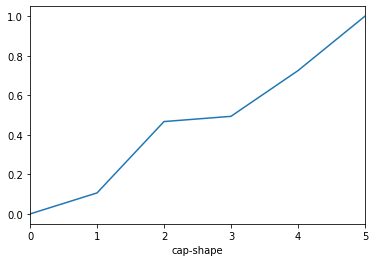

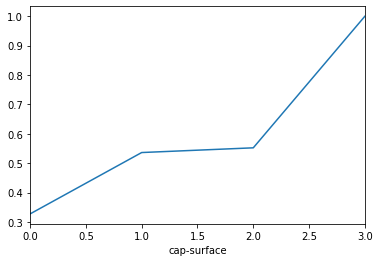

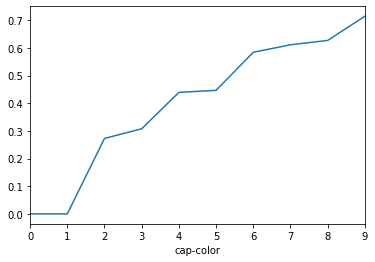

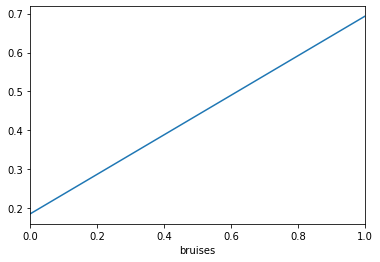

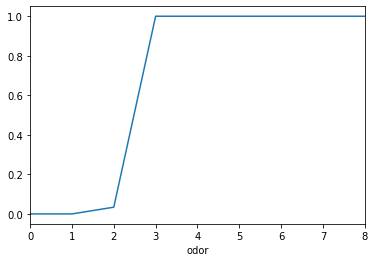

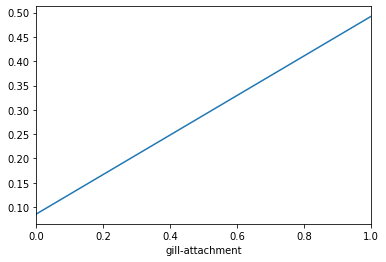

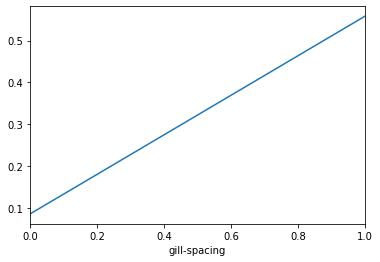

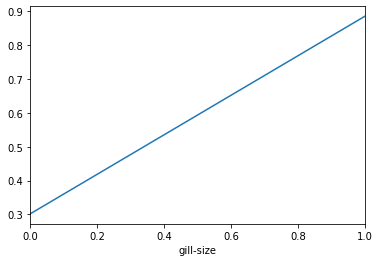

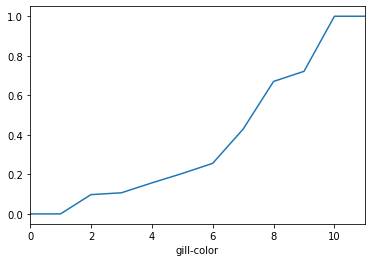

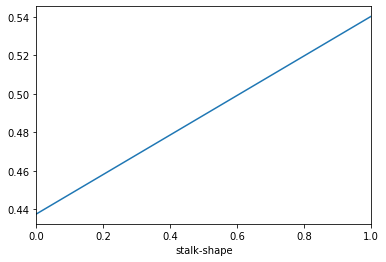

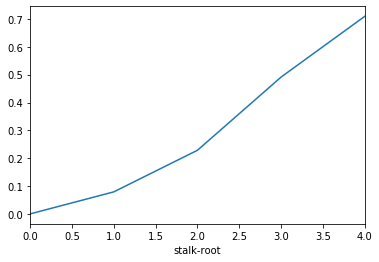

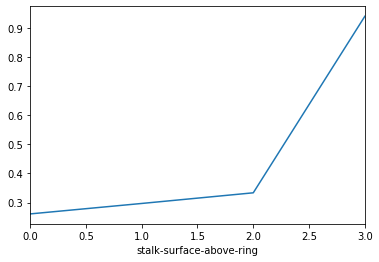

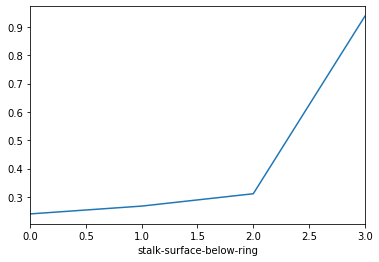

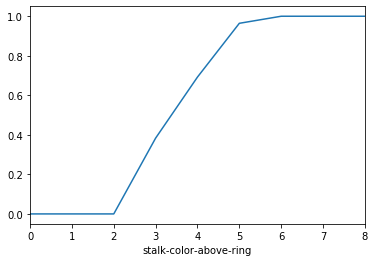

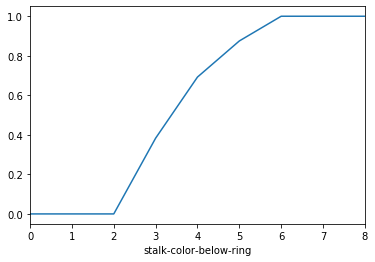

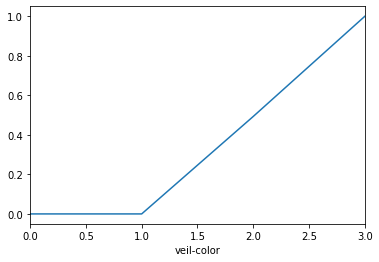

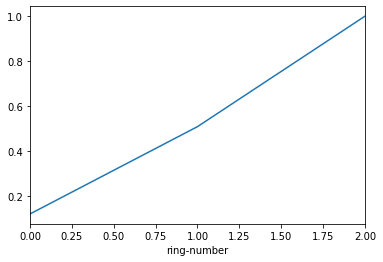

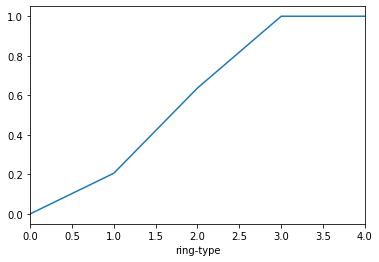

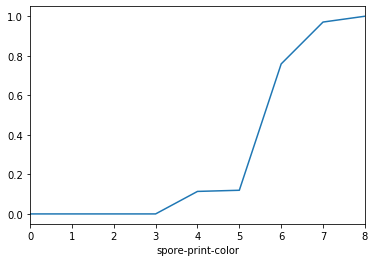

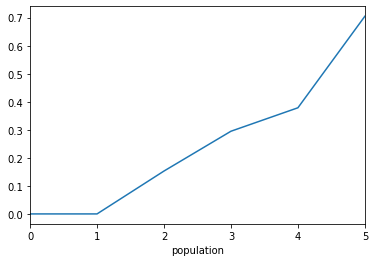

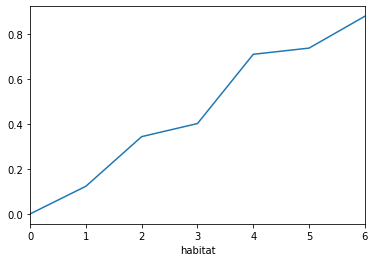

In [20]:
for feature in features:
    df.groupby([feature])['poisonous'].mean().plot()
    plt.show()

for Feature selection we are using SelectKBest, chi2 (chi square). 

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
selectk = SelectKBest(score_func=chi2,k=12)

In [23]:
feature_scores = selectk.fit(df.drop('poisonous',axis=1),df['poisonous'])

In [24]:
feature_scores.scores_

array([8.11627450e+01, 1.40804046e+02, 1.73536708e+02, 8.49174461e+02,
       6.81937996e+03, 3.50544682e+00, 1.59241838e+02, 1.63660683e+03,
       4.07407532e+03, 4.79595103e+01, 4.12745451e+02, 1.69875233e+03,
       4.60417395e+02, 8.39932627e+02, 8.41754028e+02, 5.12682568e+00,
       2.94729312e+01, 1.01318427e+03, 1.06588501e+03, 9.00407999e+02,
       9.85479495e+02])

We obtained scores related to every feature with respect to output variable.

In [25]:
scores_df = pd.DataFrame(feature_scores.scores_)
features_df = pd.DataFrame(features)
feature_scores_df = pd.concat([features_df,scores_df],axis=1) 
feature_scores_df.columns = ['feature','score']

We are mapping each feature with respect to its score.

In [26]:
feature_scores_df.sort_values(by='score',ascending=False,inplace=True)

In [27]:
feature_scores_df

,feature,score
4,odor,6819.379957
8,gill-color,4074.075323
11,stalk-surface-above-ring,1698.752334
7,gill-size,1636.606833
18,spore-print-color,1065.885011
17,ring-type,1013.184267
20,habitat,985.479495
19,population,900.407999
3,bruises,849.174461
14,stalk-color-below-ring,841.754028


Visualising for better understanding.

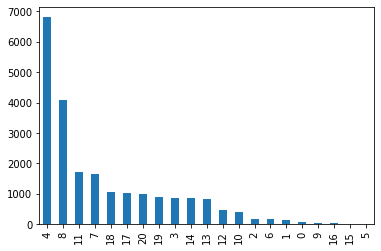

In [28]:
feature_scores_df['score'].plot(kind='bar')

We are selecting those features which are scored more than 800 

In [29]:
Best_features = feature_scores_df[feature_scores_df['score']>800]

In [30]:
Best_features

,feature,score
4,odor,6819.379957
8,gill-color,4074.075323
11,stalk-surface-above-ring,1698.752334
7,gill-size,1636.606833
18,spore-print-color,1065.885011
17,ring-type,1013.184267
20,habitat,985.479495
19,population,900.407999
3,bruises,849.174461
14,stalk-color-below-ring,841.754028


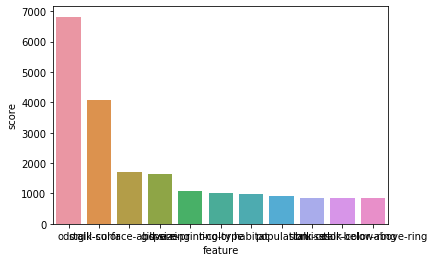

In [31]:
sns.barplot(x='feature',y='score',data=Best_features)

In [32]:
Best_features = Best_features['feature'].values

In [33]:
Best_features

array(['odor', 'gill-color', 'stalk-surface-above-ring', 'gill-size',
       'spore-print-color', 'ring-type', 'habitat', 'population',
       'bruises', 'stalk-color-below-ring', 'stalk-color-above-ring'],
      dtype=object)

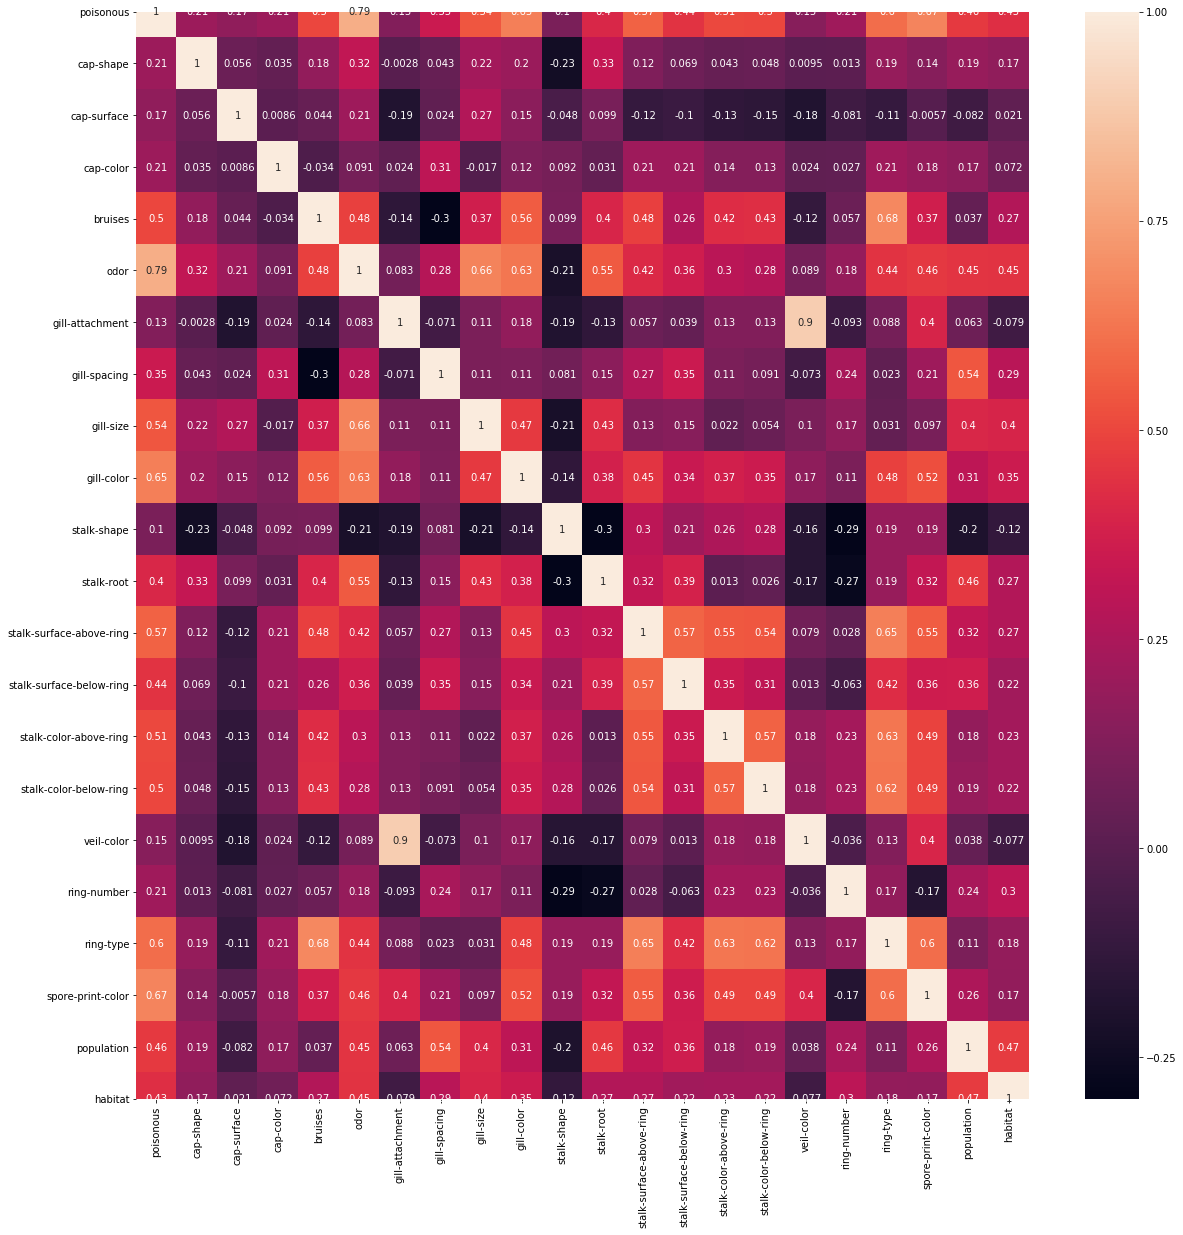

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

From above, we can notice that odor, gill-color, ring-type, spore-print-color are correlated more than 60% with respect to output variable.

We are splitting our Dataset into training and testing with the help of train_test_split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[Best_features],df['poisonous'],test_size = 0.2,random_state=0 )

In [36]:
X_train

,odor,gill-color,stalk-surface-above-ring,gill-size,spore-print-color,ring-type,habitat,population,bruises,stalk-color-below-ring,stalk-color-above-ring
7434,2,7,1,0,6,1,2,3,1,3,3
7725,2,8,1,0,6,1,2,1,1,3,3
783,1,3,1,0,5,1,1,3,0,3,3
1928,2,9,1,0,5,2,2,3,1,3,3
7466,8,10,1,1,6,2,4,5,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...
4931,2,0,1,0,6,2,0,2,0,0,0
3264,4,9,3,0,7,3,6,4,1,5,4
1653,2,9,0,0,4,2,2,3,1,3,3
2607,2,3,1,0,4,1,3,5,0,1,1


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

#### Good Feature engineering, Feature selection and Balanced Dataset we got Maximum accuracy for all the above models.

In [39]:
model = KNeighborsClassifier()

In [40]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
y_predict = model.predict(X_test)

In [42]:
y_pred_proba0 = model.predict_proba(X_train)

In [43]:
y_pred_proba1 = model.predict_proba(X_test)

In [44]:
roc_auc_score(y_train,y_pred_proba0[:,1])

1.0

In [45]:
roc_auc_score(y_test,y_pred_proba1[:,1])

1.0

In [46]:
confusion_matrix(y_test,y_predict)

array([[852,   0],
       [  0, 773]], dtype=int64)

In [47]:
accuracy_score(y_test,y_predict)

1.0

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,df[Best_features].sample(frac=1,random_state=0),df['poisonous'].sample(frac=1,random_state=0),cv=5)

array([1., 1., 1., 1., 1.])

In [49]:
model = DecisionTreeClassifier()

In [50]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
y_predict = model.predict(X_test)

In [52]:
y_pred_proba0 = model.predict_proba(X_train)

In [53]:
y_pred_proba1 = model.predict_proba(X_test)

In [54]:
roc_auc_score(y_train,y_pred_proba0[:,1])

1.0

In [55]:
roc_auc_score(y_test,y_pred_proba1[:,1])

1.0

In [56]:
confusion_matrix(y_test,y_predict)

array([[852,   0],
       [  0, 773]], dtype=int64)

In [57]:
accuracy_score(y_test,y_predict)

1.0

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,df[Best_features].sample(frac=1,random_state=0),df['poisonous'].sample(frac=1,random_state=0),cv=5)

array([1., 1., 1., 1., 1.])

In [59]:
model = RandomForestClassifier()

In [60]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_predict = model.predict(X_test)

In [62]:
y_pred_proba0 = model.predict_proba(X_train)

In [63]:
y_pred_proba1 = model.predict_proba(X_test)

In [64]:
roc_auc_score(y_train,y_pred_proba0[:,1])

1.0

In [65]:
roc_auc_score(y_test,y_pred_proba1[:,1])

1.0

In [66]:
confusion_matrix(y_test,y_predict)

array([[852,   0],
       [  0, 773]], dtype=int64)

In [67]:
accuracy_score(y_test,y_predict)

1.0

In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,df[Best_features].sample(frac=1,random_state=0),df['poisonous'].sample(frac=1,random_state=0),cv=5)

array([1., 1., 1., 1., 1.])

#### I hope you learned some new things.

#### Thank You...